<a href="https://colab.research.google.com/github/makarovlab/math-statistics/blob/main/Segmenting_Data_with_k_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Цели

Главной целью кластеризации является группировака элементов датасета на основе схожести признаков. Алгоритм кластеризации методом k-средних - один из наиболее простых и популярных инструментов кластеризации. В данном алгоритме используется формула Евклидова расстояния, для вычисления расстояний между элементами и центроидами кластеров. В рамках практической части данной статьи мы научимся:


*   Как выполнить импорт/экспорт и подготовку данных для дальнейшей кластеризации методом k-средних;
*   Как выполнить сегментацию данных с помощью k-сердних кластеризации;
*   Как проверять и визуализировать кластеры на графике;
*   Как подбирать оптимальное количество кластеров;
*   Как анализировать и интерпретировать результаты кластеризации.


# 1. Импорт данных

In [ ]:
import pandas as pd

In [ ]:
customers = pd.read_csv("mallcustomers.csv")

In [ ]:
customers

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40
...,...,...,...,...,...
195,196,Female,35,120000,79
196,197,Female,45,126000,28
197,198,Male,32,126000,74
198,199,Male,32,137000,18


# Исследование данных

Для начала изучим из чего состоит набор данные: признаки, типы данных признаков, количество жлементов в датасете, наличие пропусков ...
Все это можно сделать с помощью метода info:

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


У нас имеется 200 элементов, 0 пропусков, все признаки кроме Gender числовые. CustomerID содержит униклаьные идентификаторы, которые не имеет смысла использовать в анализе, единственное чем данный признак может быть полезен - это удаление дубликатов.

Можем сделать разметку признаков по типу представленных данных: числовой или категориальный.

*   CustomerID - числовой уникальнйы, но не несет смысла кроме как удаление дубликатов;
*   Gender - категориальный, всего два пола: мужской и женский. В дальнейшем могут быть закодированы например нулем и единицей;
*   Age - числовой, неприрывный, зоть и ограниченный минимальным и максимальным значениями, будет полезен для кластеризации;
*   Income - числовой, неприрывный, будет полезен для кластеризации;
*   SpendingScore - числовой, неприрывный, будет полезен для кластеризации;





In [ ]:
customers.describe(include='all').round(2)

,CustomerID,Gender,Age,Income,SpendingScore
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60560.00,50.20
std,57.88,NaN,13.97,26264.72,25.82
min,1.00,NaN,18.00,15000.00,1.00
25%,50.75,NaN,28.75,41500.00,34.75
50%,100.50,NaN,36.00,61500.00,50.00
75%,150.25,NaN,49.00,78000.00,73.00


Операция describe выводит описание датасета по основным статистическим характеристикам:

*   count - общее количество элементов в датасете;
*   unique - количество уникальных значений;
*   mean - среднее арифметическое
*   std - standard deviation, стандартное отклонение;
*   min - минимальное значение;
*   max - максимальное значение;
*   25% - квартиль, обозначающий, что 25% элементов содержат значение меньше или равное обозначенному в таблица для конкретного признака (аналогично для 50% и 75%);


По текущему набору данных можно сказать, что:

*   имеется 200 элементов;
*   разброс данных по возрасту допустимый, а вот разброс по Income и SpendingScore достаточно большой.
*   стоит проверить набор данных на наличее выбросов тк максимальное значение достаточно велико и может повлиять на кластеризацию.

Построим графики взаимного распределения признаков для анализа:


# Анализ признаков

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Построим ящики с усами для признаков Gender и Income, чтобы проверить есть ли отличия между уровнем дохода у женщин и у мужчин:

<ipython-input-92-1ab0b629a9d4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=customers,


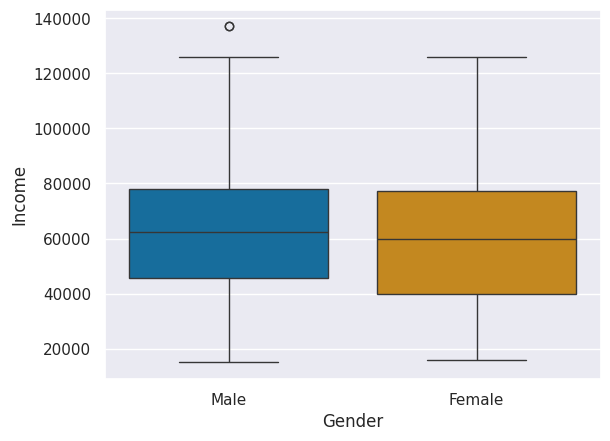

In [ ]:
ax = sns.boxplot(data=customers,
                 x='Gender',
                 y='Income',
                 palette='colorblind')


Ящики с усами показывают, что в данных нет существенных отличий. В среднем женщина зарабатывает столько же сколько и мужчина. Также мы нашли один выброс который может повлиять на кластеризацию, но он не сильный.

<ipython-input-93-7b4600f40846>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=customers,


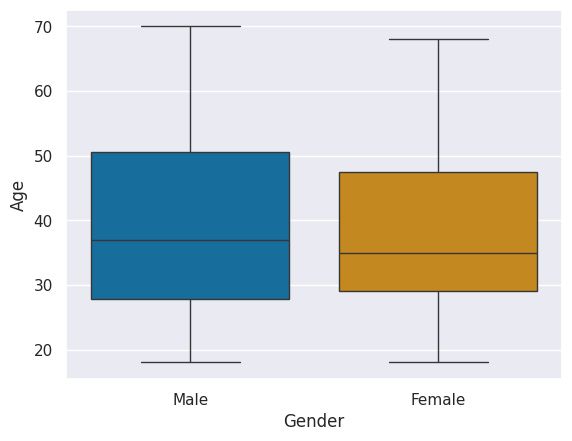

In [ ]:
ax = sns.boxplot(data=customers,
                 x='Gender',
                 y='Age',
                 palette='colorblind')

При анализе соотношения гендера относительно возраста, существенных отличий не найдено. Мы видим, что в квантиле 75% у мужчин возраст несущественно выше. В целом среднее значение возраста одинаково.

<ipython-input-94-11de26380044>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=customers,


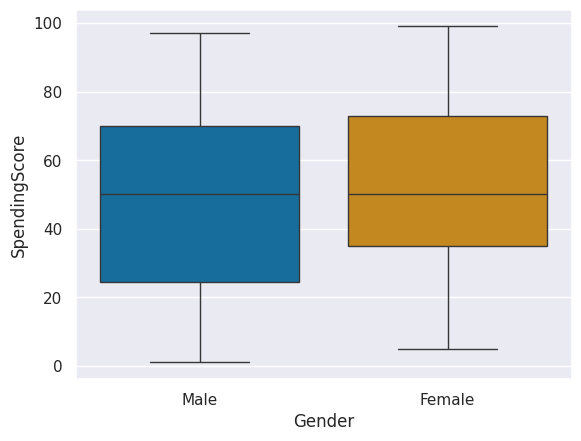

In [ ]:
ax = sns.boxplot(data=customers,
                 x='Gender',
                 y='SpendingScore',
                 palette='colorblind')

25% женщит имеют уровень активности покупок примерно 37
25% мужчин имеют уровень активности покупок примерно 22

это значит что уровень активности покупок у женщин выше чем у мужчин.

<ipython-input-95-1ab0b629a9d4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=customers,


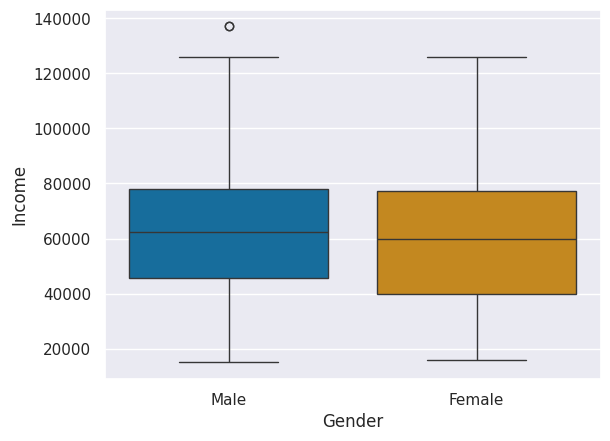

In [ ]:
ax = sns.boxplot(data=customers,
                 x='Gender',
                 y='Income',
                 palette='colorblind')

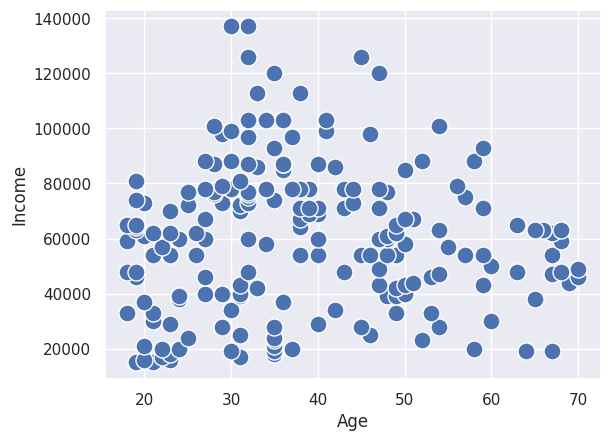

In [ ]:
ax = sns.scatterplot(data=customers,
                 x='Age',
                 y='Income',
                 s=150)

На графике видно, что наибольший доход имеют клиенты в возрасте от 30 до 50 лет.

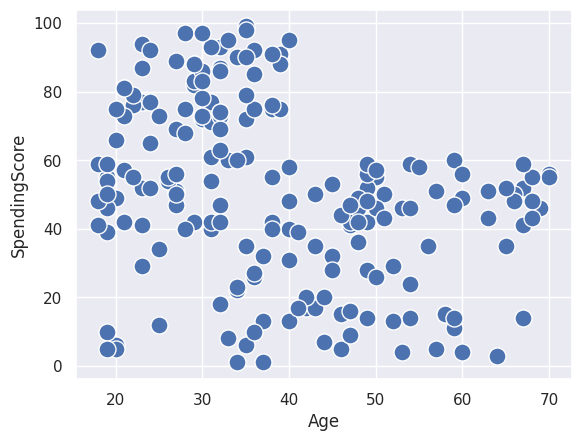

In [ ]:
ax = sns.scatterplot(data=customers,
                 x='Age',
                 y='SpendingScore',
                 s=150)

На графике четко видно, что люди в возрасте от 20 до 40 имеют наибольшую покупательную активность.

<ipython-input-98-357b4dd7ec68>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(data=customers,


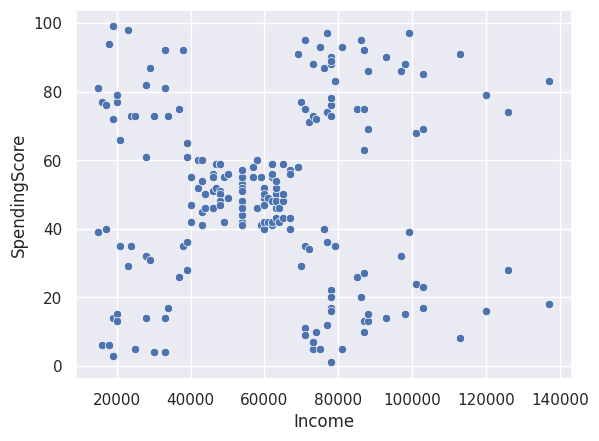

In [ ]:
ax = sns.scatterplot(data=customers,
                 x='Income',
                 y='SpendingScore',
                 palette='colorblind')

Отношение доходов относительно расходов позволяет сразу выделить четыре группы:


*   те кто мало зарабатывают и мало тратят
*   те кто мало зарабатывают и много тратят
*   те кто много зарабатывают и мало тратят
*   те кто много зарабатывают и много тратят



Продолжим работу с признаками Income и SpendingScore. Посмотрим на описательные статистики только этих признаков:

**Важно отметить что проделанный анализ взаимного распределения признаков дал на понять в каком направлении двигаться и какие признаки использовать для кластеризации. Таким образом при сравнение гендера с остальными признаками мы не увидели никаких существенных различий. Если нет различий, то нет и смысла использовать данные признаки для кластеризации, они не навредят, но и не принесут никакой пользы, только потратим свое время.**

# Стандартизация выбранных признаков

In [ ]:
customers[['Income', 'SpendingScore']].describe()

,Income,SpendingScore
count,200.000000,200.000000
mean,60560.000000,50.200000
std,26264.721165,25.823522
min,15000.000000,1.000000
25%,41500.000000,34.750000
50%,61500.000000,50.000000
75%,78000.000000,73.000000
max,137000.000000,99.000000


Первое что стоит отметить - это масштаб данных в каждом из признаков. Конечно, масштаб не сопоставим. Так как в алгоритме используется Евклидово расстояние, то признак Income будет брать на себя основное влияние, а SpendingScore практически не будет оказывать влияние. Для примера вычислим расстояние между двумя точками:

math.sqrt((19000 - 15000)^2 + (55 - 34)^2) ==

math.sqrt(2000^2 + 21^2)

даже не возводя числа в квадрат мы выдим насколько большое значение получится при возведении 2000 в квадрат и если к данному числу добавить квадрат 21ого, то влияние второго признака оказывается абсолютно несущественным.

Поэтому требуется быполнить нормализацию или стандартизацию.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
customers_scaled = scaler.fit_transform(customers[['Income', 'SpendingScore']])
customers_scaled[0:10]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002]])

In [ ]:
customers_scaled = pd.DataFrame(customers_scaled, columns=['Income', 'SpendingScore'])
customers_scaled

,Income,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [ ]:
customers_scaled.describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.74,-1.91
25%,-0.73,-0.60
50%,0.04,-0.01
75%,0.67,0.89
max,2.92,1.89


Стандартизация данных завершена. Как и ожидалось мы получили стандартное отклонение равное единице, а среднее нулю.

# Кластеризация

In [ ]:
from sklearn.cluster import KMeans

При инициализации мы передаем классу KMeans три аргумента:


1.   n_clusters - количество кластеров;
2.   n_init - количество раз алгоритм будет запускаться с новым положением центроидов кластера;
3.   random_state - передаем любое число, данный аргумент позволит каждый раз получать одинаковые результаты для сравнения после внесения изменений.



In [ ]:
km = KMeans(n_clusters=3, n_init=25, random_state=1234)

Чтобы выполнить кластеризацию мы вызываем метод fit у объекта km:

In [ ]:
km.fit(customers_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

Кластеризация выполненна и мы можем проверить два атрибута: labels_ и inertia_

In [ ]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [ ]:
''' WCSS - within-cluster sum of squared distances parameter is inertia. Low value better for us.'''

km.inertia_

157.7040081503594

# Проверка качества кластеризации и визуализация кластеров

In [ ]:
pd.Series(km.labels_).value_counts()

0    123
2     39
1     38
dtype: int64

Судя по количеству элементов внутри кластеров, первый кластер требует дополнительного внимания, тк от объединяет в себе значительно большее количество элементов, чем остальные два.

In [ ]:
km.cluster_centers_

array([[-0.62618966, -0.01439238],
       [ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275]])

In [ ]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns=['Income', 'SpendingScore'])
cluster_centers

,Income,SpendingScore
0,-0.626190,-0.014392
1,1.009200,-1.225535
2,0.991583,1.239503


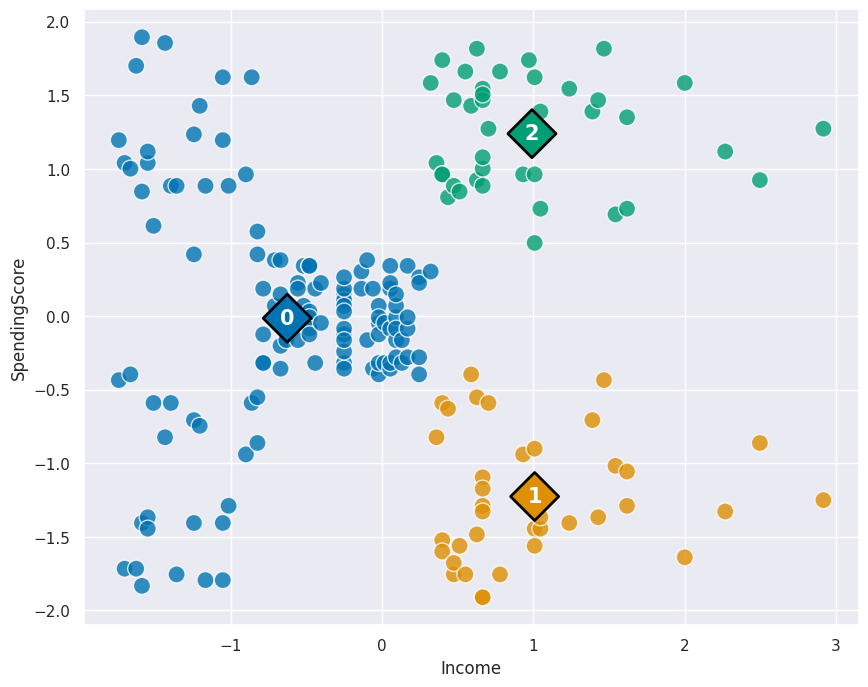

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore',
                     hue = km.labels_,
                     palette = 'colorblind',
                     alpha = 0.8,
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers,
                     x = 'Income',
                     y = 'SpendingScore',
                     hue = cluster_centers.index,
                     palette = 'colorblind',
                     s = 600,
                     marker = 'D',
                     ec = 'black',
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i],
                        y = cluster_centers.SpendingScore[i],
                        s = i,
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

В результате визуализации можно сказать, что кластер под номером 0 можно попробовать разделить на два кластера путем увеличения количества кластеров на 1.

# Выбор оптимального количества кластеров

## WCSS
Метод "Внутрикластерная сумма квадратов расстояний" (WCSS - within cluster sum of squares)

In [ ]:
wcss = []

In [ ]:
for i in range(2, 11):
  km_ = KMeans(n_clusters=i, n_init=25, random_state=1234)
  km_.fit(customers_scaled)
  wcss.append(km_.inertia_)

In [ ]:
wcss

[269.08518232778204,
 157.7040081503594,
 108.92131661364357,
 65.56840815571681,
 55.057348270386015,
 44.91118554999013,
 37.151357067931066,
 32.33081392367578,
 29.09056889736972]

In [ ]:
# По умолчанию pandas выполнит индексацию от 0 до 11
# мы заменяем индексацию на количество класеров для простоты визуализации в будущем
# а также чтобы не создавать дополнительные колонки

wcss_series = pd.Series(wcss, index=range(2, 11))
wcss_series

2     269.085182
3     157.704008
4     108.921317
5      65.568408
6      55.057348
7      44.911186
8      37.151357
9      32.330814
10     29.090569
dtype: float64

[Text(0.5, 0, 'Number of clusters (k)'),
 Text(0, 0.5, 'Within Cluster Sum of Squares (WCSS)')]

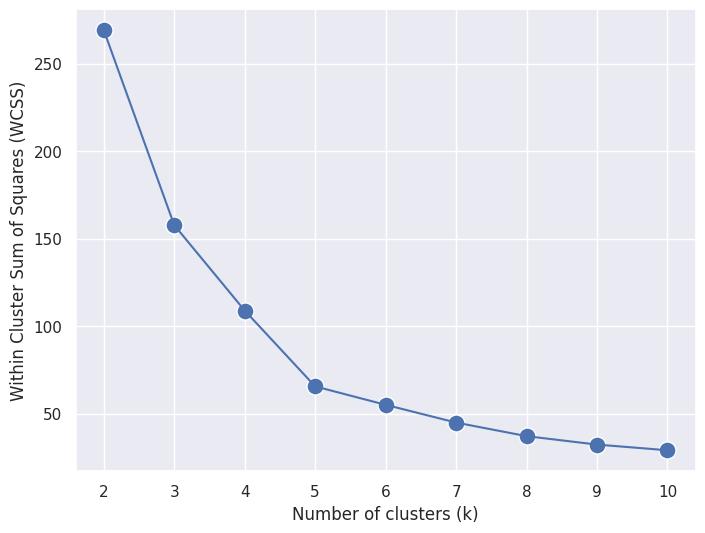

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x=wcss_series.index, y=wcss_series)
ax = sns.scatterplot(
    x=wcss_series.index,
    y=wcss_series,
    s=150)
ax.set(xlabel="Number of clusters (k)",
       ylabel="Within Cluster Sum of Squares (WCSS)")

Судя по полученному графику, нам стоит выбрать количество кластеров равное 5 тк с этого момента изменение параментра WCSS прекращает существенно меняться. Стоит также отметить, что одно лишь одно "мнение" и стоит попробовать рассчитать количество кластеров с помощью других методов.

## Silhouette method

Метод силуэта для подбора количества кластеров

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette = []

In [ ]:
for i in range(2, 11):
  km_ = KMeans(n_clusters=i, n_init=25, random_state=1234)
  km_.fit(customers_scaled)
  silhouette.append(silhouette_score(customers_scaled, km_.labels_))

In [ ]:
silhouette

[0.2895327013768624,
 0.46658474419000145,
 0.4939069237513199,
 0.5546571631111091,
 0.5398800926790663,
 0.526345449071225,
 0.45644093438859246,
 0.45941332778471505,
 0.4476280825932578]

In [ ]:
silhouette_series = pd.Series(silhouette, index=range(2, 11))
silhouette_series

2     0.289533
3     0.466585
4     0.493907
5     0.554657
6     0.539880
7     0.526345
8     0.456441
9     0.459413
10    0.447628
dtype: float64

[Text(0.5, 0, 'Number of clusters (k)'),
 Text(0, 0.5, 'Average Silhouette score')]

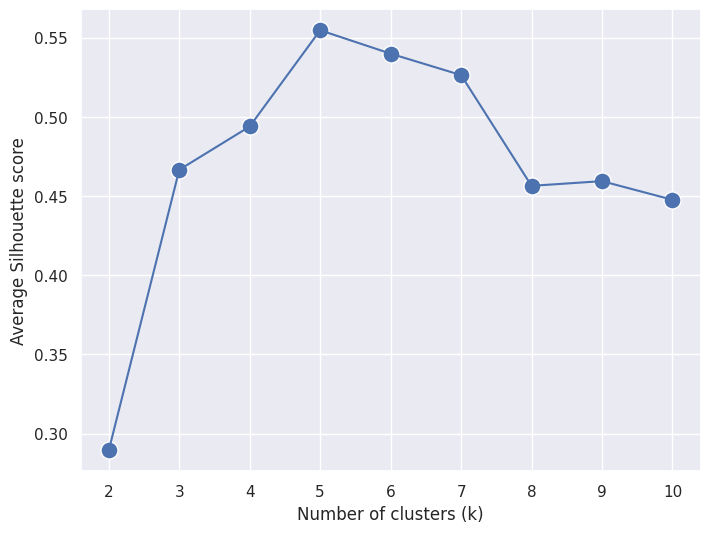

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x=silhouette_series.index, y=silhouette_series)
ax = sns.scatterplot(
    x=silhouette_series.index,
    y=silhouette_series,
    s=150)
ax.set(xlabel="Number of clusters (k)",
       ylabel="Average Silhouette score")

В данном методе подбора оптимального количества кластеров, наибольшее метрики среднего силуэта соответствует рекомендуемому количеству кластеров. В нашем случае на графике это 5 кластеров.

## Calinski Harabasz Score

In [ ]:
from sklearn.metrics import calinski_harabasz_score

In [ ]:
calinski_harabasz = []

In [ ]:
for i in range(2, 11):
  km_ = KMeans(n_clusters=i, n_init=25, random_state=1234)
  km_.fit(customers_scaled)
  calinski_harabasz.append(calinski_harabasz_score(customers_scaled, km_.labels_))

In [ ]:
calinski_harabasz

[96.3305882355264,
 151.33512126359483,
 174.5952145929763,
 248.64932001536363,
 243.08789485068303,
 254.32469420700534,
 267.8884623844161,
 271.5088410175798,
 269.170061259085]

In [ ]:
calinski_harabasz_series = pd.Series(calinski_harabasz, index=range(2, 11))
calinski_harabasz_series

2      96.330588
3     151.335121
4     174.595215
5     248.649320
6     243.087895
7     254.324694
8     267.888462
9     271.508841
10    269.170061
dtype: float64

[Text(0.5, 0, 'Number of clusters (k)'),
 Text(0, 0.5, 'Calinski Harabasz Score')]

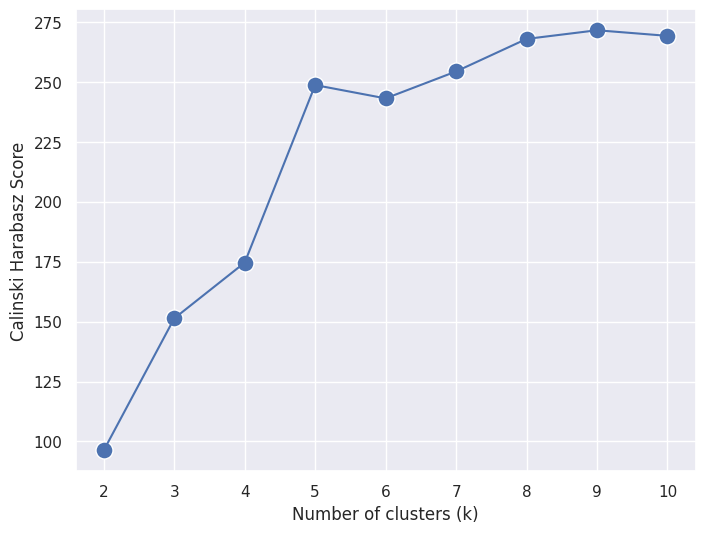

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(x=calinski_harabasz_series.index, y=calinski_harabasz_series)
ax = sns.scatterplot(
    x=calinski_harabasz_series.index,
    y=calinski_harabasz_series,
    s=150)
ax.set(xlabel="Number of clusters (k)",
       ylabel="Calinski Harabasz Score")

В соответствии с метрикой Calinski Harabasz Score оптимальным является число кластеров в первом максимуме распределения, где происходит первый перелом графика. То есть третий метод тоже дал рекомендацию использовать 5 кластеров для данного датасета.

# Анализ и интерпретация результатов кластеризации

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=5, n_init=25, random_state=1234)
km.fit(customers_scaled)

print(km.inertia_)
print(km.labels_)
print(km.cluster_centers_)

65.56840815571681
[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 4 0 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 1 2 4 2 1 2 1 2 4 2 1 2 1 2 1 2 1 2 4 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
[[-1.30751869 -1.13696536]
 [ 1.05500302 -1.28443907]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [-0.20091257 -0.02645617]]


In [ ]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns=['Income', 'SpendingScore'])
cluster_centers

,Income,SpendingScore
0,-1.307519,-1.136965
1,1.055003,-1.284439
2,0.991583,1.239503
3,-1.329545,1.132178
4,-0.200913,-0.026456


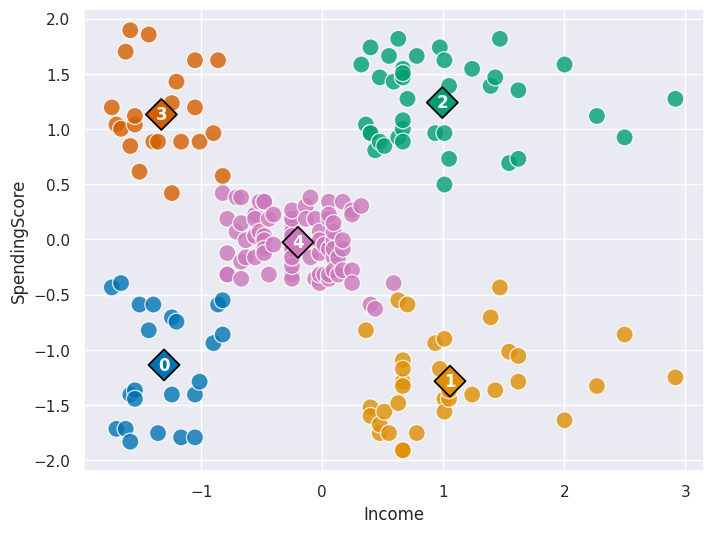

In [ ]:
plt.figure(figsize=(8,6))

ax = sns.scatterplot(
    data=customers_scaled,
    x='Income',
    y='SpendingScore',
    hue=km.labels_,
    palette='colorblind',
    alpha=0.8,
    s=150,
    legend=False)

ax = sns.scatterplot(
    data=cluster_centers,
    x='Income',
    y='SpendingScore',
    hue=cluster_centers.index,
    palette='colorblind',
    s=250,
    marker = 'D',
    ec = 'black',
    legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i],
                        y = cluster_centers.SpendingScore[i],
                        s = i,
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 12,
                        weight = 'bold',
                        color = 'white')

Теперь мы можем сравнить графики, где у нас 3 кластера и 5.
Кластер, который был раньше единым целым под номером 0, превратился в 3 кластера: 0, 3, 4. Визуально такое разделение выглядит более логичным. Теперь необходимо интерпретировать результаты кластеризации и для этого мы можем использовать признаки на основе которых строилась кластеризация.

Для начала добавим новую колонку в исходный датасет клиентов, чтобы выполнить разметку датасета:

In [ ]:
customers['Cluster'] = km.labels_.tolist()
customers.head(10)

,CustomerID,Gender,Age,Income,SpendingScore,Cluster
0,1,Male,19,15000,39,0
1,2,Male,21,15000,81,3
2,3,Female,20,16000,6,0
3,4,Female,23,16000,77,3
4,5,Female,31,17000,40,0
5,6,Female,22,17000,76,3
6,7,Female,35,18000,6,0
7,8,Female,23,18000,94,3
8,9,Male,64,19000,3,0
9,10,Female,30,19000,72,3


Для упрощения анализа преобразуем единственный категориальный признак gender в бинарный.

В библиотеке pandas имеется метод get_dummies, который принимает на вход датафрейм и список колонок, которые необходимо преобразовать в бинарные. Естественно необязательно в колнке иметь только бинарные значения как в нашем случае с гендером. Если допустим у нас есть признак Score который измеряется от 1 до 5, то хоть у нас и числа в признаке все равно он является категориальным и при исползовании метода pd.get_dummies мы удалим текущий признак, а на основе него появятся пять новых бинарных:

*   Score_1
*   Score_2
*   Score_3
*   Score_4
*   Score_5


В нашем же случае сгенерируются всего два признака:

*   Gender_Female
*   Gender_Male



In [ ]:
pd.get_dummies(customers, columns=['Gender'])

,CustomerID,Age,Income,SpendingScore,Cluster,Gender_Female,Gender_Male
0,1,19,15000,39,0,0,1
1,2,21,15000,81,3,0,1
2,3,20,16000,6,0,1,0
3,4,23,16000,77,3,1,0
4,5,31,17000,40,0,1,0
...,...,...,...,...,...,...,...
195,196,35,120000,79,2,1,0
196,197,45,126000,28,1,1,0
197,198,32,126000,74,2,0,1
198,199,32,137000,18,1,0,1


In [ ]:
customers = pd.get_dummies(customers, columns=['Gender'])
customers.head()

,CustomerID,Age,Income,SpendingScore,Cluster,Gender_Female,Gender_Male
0,1,19,15000,39,0,0,1
1,2,21,15000,81,3,0,1
2,3,20,16000,6,0,1,0
3,4,23,16000,77,3,1,0
4,5,31,17000,40,0,1,0


In [ ]:
customers.agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median',
}).round(2)

Gender_Female        0.56
Gender_Male          0.44
Age                 36.00
Income           61500.00
SpendingScore       50.00
dtype: float64

In [ ]:
customers.groupby('Cluster').agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median',
}).round(2)

,Gender_Female,Gender_Male,Age,Income,SpendingScore
Cluster,,,,,
0,0.61,0.39,46.0,25000.0,17.0
1,0.46,0.54,42.0,85000.0,16.0
2,0.54,0.46,32.0,79000.0,83.0
3,0.59,0.41,23.5,24500.0,77.0
4,0.59,0.41,46.0,54000.0,50.0


Исходя из общей агрегации датасета, у нас в целом в наборе данных женщим больше чем мужчин. Следовательно смещение в сгруппированном по кластерам анализе стоит учитывать это смещение.

**Что можно сказать о кластере #0**

Умеренное преобладание женского пола, средний возраст 46 лет говорит о том, что клиенты данного кластера одни из самых возрастных в среднем по набору данных. Обладают низким доходом, но и траты на низком уровне. Скорее всего ведут скромный образ жизни и находят способ копить финансы.

**Что можно сказать о кластере #1**

Небольшое преобладание мужского пола, средний возраст 42 года говорит о том, что клиенты данного кластера тоже в зрелом возрасте но немного младше самых возрастных. Обладают высоким доходом, но траты на низком уровне. Скорее всего ведут скромный образ жизни и стараются откладывать максимум заработанного.


**Что можно сказать о кластере #2**

Практические идентичное соотношение мужчин и женщин, средний возраст 32 года говорит о том, что клиенты достаточно молодые, но уже ближе к зрелому возрасту. Обладают самым высоким уровнем дохода и трат.

**Что можно сказать о кластере #3**

Практические идентичное соотношение мужчин и женщин, средний возраст 23 года говорит о том, что клиенты относятся к самой молодой категориии обладают самым низким уровнем заработка однако одинм из самых высоких уровней трат.

**Что можно сказать о кластере #4**

Преобладание женского пола, относятся к самой старшей категории клиентов со средним уровнем заработка и средним уровнем трат.


# Вывод

С точки зрения построения стратегии взаимодействия с клиентами имеет смысл:


*   Увеличить количество трат клиентов с высоким уровнем заработка, но низким уровнем трат в кластере  №1;
*   Во вторых следует поддерживать лояльность клиентов, у которых высокий заработок и высокий уровень трат;
*   В третьих, стоит приглядывать за теми кто мало зарабатывает, но много тратит. Данная активность может оказаться подозрительной.

